# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('/content/drive/MyDrive/Concrete_Data (4).xlsx')

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

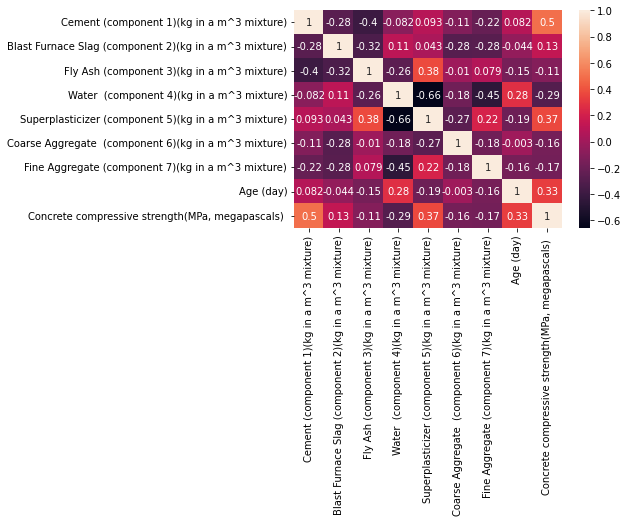

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

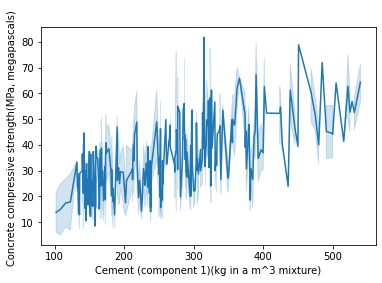

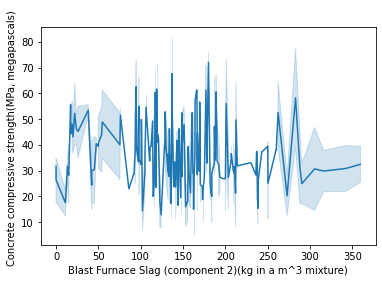

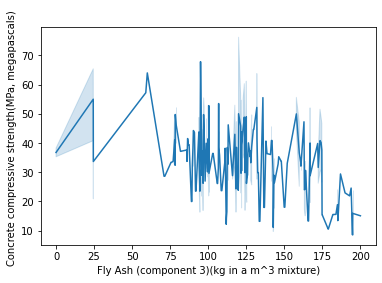

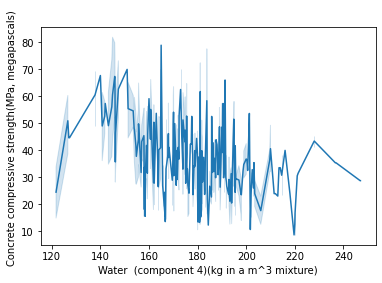

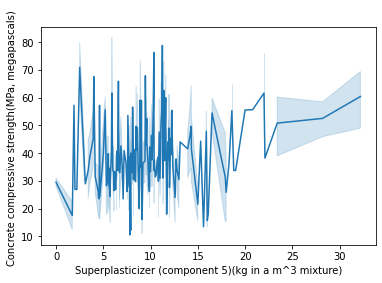

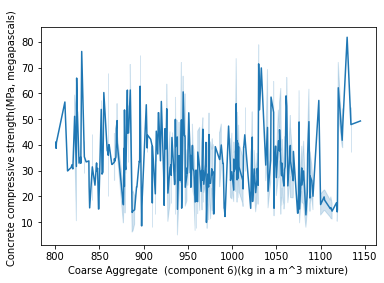

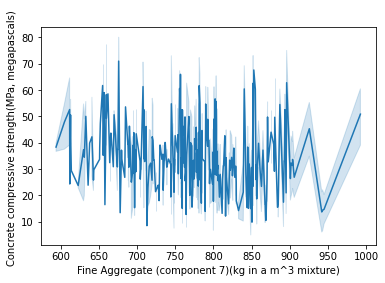

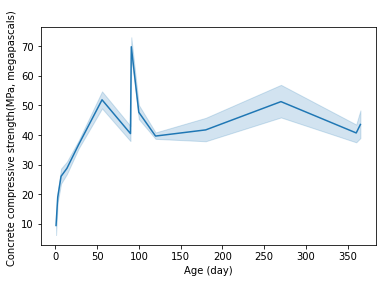

In [ ]:
for col in df.columns[:-1]:
 sns.lineplot(data=df, x=col, y='Concrete compressive strength(MPa, megapascals) ')
 plt.show()

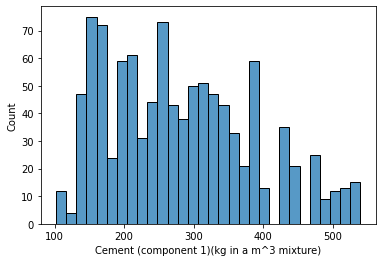

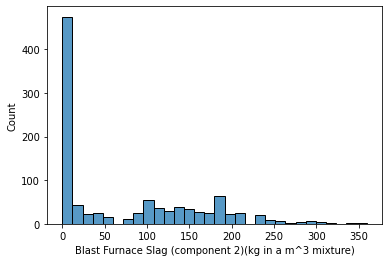

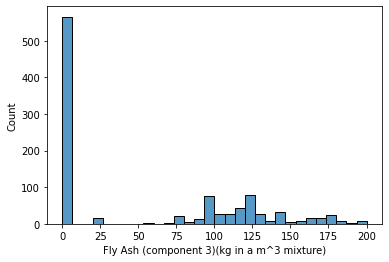

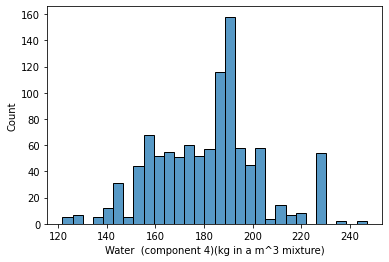

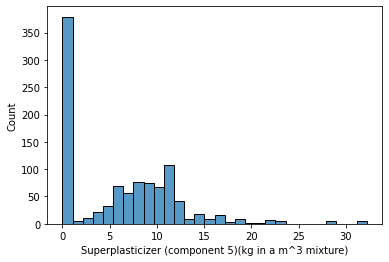

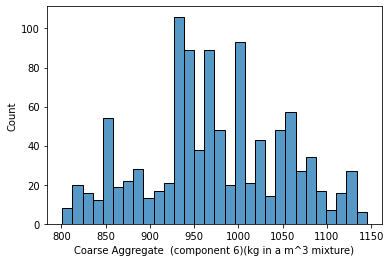

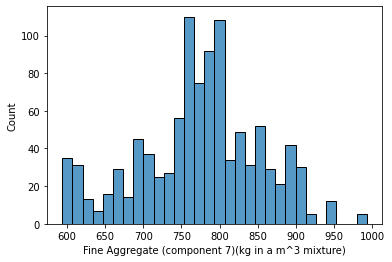

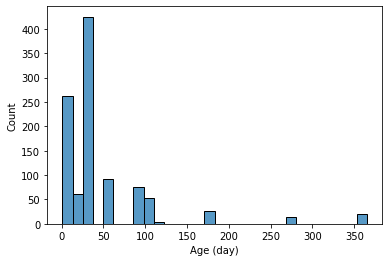

In [ ]:
for col in df.columns[:-1]:
  sns.histplot(data=df,x=col,bins=30)
  plt.show()

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , shuffle= True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dict_1={}
for i in range(1,10):
  poly_reg=PolynomialFeatures(degree=i)
  lin_reg=LinearRegression()
  X_poly=poly_reg.fit_transform(X_train)
  lin_reg.fit(X_poly,y_train)
  Er2=r2_score(y_test,lin_reg.predict(poly_reg.fit_transform(X_test)))
  k=str(i)
  dict_1[k]=Er2
dict_1
  



{'1': 0.6368981103411098,
 '2': 0.763551040725108,
 '3': 0.8059308276474478,
 '4': -32.46310727638317,
 '5': -3325397.0829539816,
 '6': -21848407.025953304,
 '7': -4264271.776713035,
 '8': -2313943.798928012,
 '9': -32324891.603853405}

In [ ]:
from sklearn.linear_model import Lasso,Ridge
def get_best_r2_score(X_train,y_train,X_test,y_test,polynomial=5):
  poly_reg = PolynomialFeatures(degree = polynomial)
  X_poly_train = poly_reg.fit_transform(X_train)
  X_poly_test=poly_reg.transform(X_test)
  dict_ridge={}
  for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(X_poly_train, y_train)
    ER2=r2_score(y_test,ridge.predict(X_poly_test))
    k=str(alpha)
    dict_ridge[k]=ER2
  dict_lasso={}  
  for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(X_poly_train, y_train)
    ER2=r2_score(y_test,lasso.predict(X_poly_test))
    k=str(alpha)
    dict_lasso[k]=ER2
  #df_ridge=pd.DataFrame(dict_ridge)
  #df_lasso=pd.DataFrame(dict_lasso)
  return dict_ridge,dict_lasso

get_best_r2_score(X_train,y_train,X_test,y_test,9)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning

({'0.0001': 0.08822672981775925,
  '0.001': 0.6921538551823898,
  '0.01': 0.8255371397769425,
  '1': 0.6723366080348989,
  '10': 0.506030832077032,
  '1e-08': -533.526099232031,
  '1e-10': -1492.0318921328956,
  '1e-15': -3020.9324347730267,
  '20': 0.43436130895261327,
  '5': 0.5712553094164278},
 {'0.0001': 0.8156474373827354,
  '0.001': 0.8712468340957125,
  '0.01': 0.7975763073047523,
  '1': -0.00759422299508028,
  '10': -0.00759422299508028,
  '1e-08': 0.34833561547018177,
  '1e-10': 0.3479368070213458,
  '1e-15': 0.34793278066504096,
  '20': -0.00759422299508028,
  '5': -0.00759422299508028})